# Amazon Data Sciences books analysis

## Introduction
The dataset contains 946 books obtained from scraping Amazon books related to data science, statistics, data analysis, Python, deep learning, and machine learning.
There are 18 columns:

> * `title`: title of the book
> * `author`: author (or the authors) of the book
> * `price`: price (in dollars)
> * `price (including used books)`: price range of new and used books (in dollars)
> * `pages`: number of pages
> * `avg_reviews`: average reviews (out of 5)
> * `n_reviews`: reviews done for each book
> * `star5`: percentage of 5 star reviews
> * `star4`: percentage of 4 star reviews
> * `star3`: percentage of 3 star reviews
> * `star2`: percentage of 2 star reviews
> * `star1`: percentage of 1 star reviews
> * `dimensions`: size of the book (in inches)
> * `weight`: weight (in pounds or ounces)
> * `language`: language of the book
> * `publisher`: publisher
> * `ISBN-13`: ISBN_13 code
> * `link`: link of the Amazon book
> * `complete_link`: complete link of the Amazon book (including the domain https://amazon.com)

### Inspiration

You can perform an exploratory data analysis of the dataset, working with Pandas or Numpy.
Interesting visualizations can be performed too using, for instance, Python libraries to plot the different features.
This dataset can be also used to practice queries using SQL or Pandas.
Moreover, you can rank the books based on the number of positive reviews, or you can explore the dataset to have a reference for buying data-science-related books in the future.

Remember to upvote if you found the dataset useful :).
Collection methodology

The dataset was obtained through web scraping from Amazon.
More than 1700 books were scraped, fetching the most important information for each book.
Duplicated were deleted, each column was formatted and made easy to use for data analysis purposes.
Rows containing a lot of missing values were deleted, and in some cases, were filled with an appropriate value based on the column. Thus, the total number of books passed from 1788 to 946.

### Few Open question to investigate in the dataset:

* are there link between rating and price of the books
* are there link between rating and size of the books
* are there a link between rating and number of page. Is there also a correlation between rating & price?
* Are there correlation bewteen the rating and the editing company
* is there a correlation between rating & nb of comment?
* Are the quality of books published the same for one author? or are there disparities in the quality through one same single author?
* Are we observing the same analysis for books written in different languages?

## Approach
In order to reach our goal, we will divide our project in four steps:
> 1. **[Exploratory Data Analysis](#title1)** (EDA): a mandatory step to comprehend and understand our datase (descriptive data, correlation between variables, data cleaning, visualization graphs...)
> 2. **[Data Processing](#title2)**: NLP methods require to transform raw data (comments) in usable and workable data (tokenization, stemming, regular expression...).
> 3. **[Modeling](#title3)**: training machine learning and deep learning models and interpreting results.
> 4. **[Predictions & Conclusion](#title4)**: test driving the model chosen upon selection criteria (interpretability & performances).


## 1. Explorative Data Analysis <a id="title1"></a>

### 1.1. Data description and preparation
Through this part we will proceed to analysis (distribution, etc.)  and cleaning of the dataset (NaN, duplicates, etc.) 

#### 1.1.1. Dataset discovery

In [1]:
import pandas as pd
#!pip install ydata-profiling
#from ydata_profiling import ProfileReport # replace pandas_profiling
import numpy as np
import datetime as dt
import pprint

# Graphic libraries
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
raw_df = pd.read_csv("final_book_dataset_kaggle2.csv")
raw_df.head()


,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


In [3]:
raw_df.info()
#display(raw_df.describe())
print("\nMissing values:")
display(raw_df.isnull().sum(axis=0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

title                             0
author                          173
price                           108
price (including used books)    108
pages                            85
avg_reviews                     128
n_reviews                       128
star5                           128
star4                           195
star3                           276
star2                           379
star1                           502
dimensions                      186
weight                          179
language                         71
publisher                       116
ISBN_13                         165
link                              0
complete_link                     0
dtype: int64

[Comment on output of the review of the dataset]

As our analysis is mainly based on average rating (which will be our index to assess the quality of a book), we can already remove all rows without having any rating, as well as the columns which are not of interest.

In [4]:
df = raw_df.drop(['dimensions', 'price (including used books)'], axis = 1)
df.dropna(axis = 0, how = 'all', subset = ['avg_reviews'], inplace=True)

print("The number of columns in the dataframe is :", len(df.columns), "\n")
df.isnull().sum(axis=0)


The number of columns in the dataframe is : 17 



title              0
author           142
price             65
pages             44
avg_reviews        0
n_reviews          0
star5              0
star4             67
star3            148
star2            251
star1            374
weight           118
language          37
publisher         74
ISBN_13          105
link               0
complete_link      0
dtype: int64

the Analysis of empty field, suppose that the dataset doesn't include only book, as there are empty row in the field ISBN (mandatory code for any books published - paper or numerical). We will check it later after having reduced further the dataset.

#### 1.1.1.1. Reducing dataset to what is needed

Assuming our hypothesis, let's have a closer look on each variable if it might be usable for serving our purpose.

* A. Variable **`Language`**

In [5]:
df_language = df.groupby("language")['title'].count()
df_language.reset_index()


,language,title
0,"""Brilliant.""",1
1,"Concepts are presented in a ""to-the-point"" sty...",1
2,English,652
3,"English (DTS-HD Master Audio 5.1), French (DTS...",1
4,English (Dolby Digital 2.0 Mono),1
5,Spanish,4
6,This Python programming guide assumes certain ...,1
7,"Unqualified, Japanese (Dolby Digital 2.0 Mono)...",1
8,standard library,1
9,you will discover all you need,1


In [6]:
print("\nDisplay books title written in Spanish :")
display(df[df['language'] == "Spanish"].title.reset_index())


Display books title written in Spanish :


,index,title
0,18,Python para Principiantes: 2 Libros en 1: Prog...
1,480,Aprende Python en un fin de semana (Spanish Ed...
2,481,Python Aplicado (Spanish Edition)
3,613,El lenguaje de programación Python de principi...


We notice that the vast majority of books are written in english, while only 4 in Spanish. This means that we won't be able to decline our analysis further by country. Therefore we will limit our anlaysis only on Enligh-written books.

On top, we can notice that the other books with misleading language label, have their title written in English, therefore we can suppose their content is in english and assign it "English" language. In parallel to check is this assumption is correct, we have checked that spanish books have their title in Spanish.

let's arrange the dataframe accordingly.

In [7]:
df = df[df["language"] != "Spanish"]
df.language.fillna("English", inplace=True)
len(df)

698

* B. **Types** of Articles (Books, audio, movies, etc.)

Among books with misleading language label, some labels let suppose that there might be not only books. Let's deep dive :

In [8]:
print("\nDisplay books title where language has been wrongly assigned :")
display(df[(df['language'] != "English")])



Display books title where language has been wrongly assigned :


,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,weight,language,publisher,ISBN_13,link,complete_link
22,Monty Python and the Holy Grail (Special Edition),NaN,9.99,NaN,4.7,"10,103",85%,8%,3%,1%,2%,NaN,"Unqualified, Japanese (Dolby Digital 2.0 Mono)...",NaN,NaN,/Monty-Python-Holy-Grail-Special/dp/B00005O3VC...,https://www.amazon.com/Monty-Python-Holy-Grail...
54,"SQL: 3 books 1 - The Ultimate Beginner, Interm...",[ Mark Reed],22.58,346,4.6,281,77%,13%,5%,3%,2%,1.46 pounds,you will discover all you need,"Independently published (July 10, 2022)",979-8840191583,/SQL-Intermediate-Programming-Practical-Exerci...,https://www.amazon.com/SQL-Intermediate-Progra...
290,Data Analytics for Absolute Beginners: A Decon...,NaN,14.80,155,4.4,334,67%,18%,9%,2%,3%,8.3 ounces,• How to make better business decisions using,"Independently published (July 21, 2019)",978-1081762469,/Data-Analytics-Absolute-Beginners-Deconstruct...,https://www.amazon.com/Data-Analytics-Absolute...
381,Python (2nd Edition): Learn Python in One Day ...,NaN,NaN,175,4.5,"1,542",69%,19%,9%,2%,2%,NaN,"Concepts are presented in a ""to-the-point"" sty...","Learn Coding Fast; 2nd edition (May 10, 2017)",NaN,/Python-2nd-Beginners-Hands-Project-ebook/dp/B...,https://www.amazon.com/Python-2nd-Beginners-Ha...
382,Python 3: The Comprehensive Guide to Hands-On ...,"[ Johannes Ernesti, and , Peter Kaiser]",55.48,"1,000",4.3,9,71%,14%,14%,NaN,NaN,3.94 pounds,standard library,Rheinwerk Computing; First edition (September ...,978-1493223022,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
476,Microsoft Python Certification Exam 98-281 & P...,"[ Raman Publications, R Raman, et al.]",19.99,151,3.9,18,59%,13%,15%,13%,NaN,13 ounces,This Python programming guide assumes certain ...,"Independently published (January 14, 2021)",979-8589463590,/Microsoft-Python-Certification-Exam-98-281/dp...,https://www.amazon.com/Microsoft-Python-Certif...
569,Monty Python's Life Of Brian [DVD],NaN,18.85,NaN,4.8,"3,678",86%,9%,4%,1%,NaN,NaN,English (Dolby Digital 2.0 Mono),NaN,NaN,/Monty-Pythons-Brian-Graham-Chapman/dp/6305388...,https://www.amazon.com/Monty-Pythons-Brian-Gra...
582,Monty Python's The Meaning of Life [Blu-ray],NaN,9.99,NaN,4.7,"3,337",82%,10%,4%,2%,2%,NaN,"English (DTS-HD Master Audio 5.1), French (DTS...",NaN,NaN,/Monty-Pythons-Meaning-Life-Blu-ray/dp/B07G24K...,https://www.amazon.com/Monty-Pythons-Meaning-L...
633,"Python Crash Course, 2nd Edition: A Hands-On, ...",[ Eric Matthes],23.99,544,4.7,"7,767",81%,13%,4%,1%,1%,NaN,"""Brilliant.""","No Starch Press; 2nd edition (May 21, 2019)",NaN,/Python-Crash-Course-Eric-Matthes-ebook/dp/B07...,https://www.amazon.com/Python-Crash-Course-Eri...


Our assumption seems to be confirmed and futher more. We can observe 2 additionnal discrepancies in the dataset:
* Some articles are not related to Data science book but rather completely different topic (e.g.: "Monty Python's" humorist band). After checking
* Some article are indeed not book, but other support as DVD or Blu-ray. We notice they are missing ISBN code.

Let's check whether the dataset includes other similar articles

##### Checking **Non-Data-science** related article:
> We do not have further element at disposal to check further the topic of articles, except to go through detailed review of titles using NLP processing or similar. As it is not purpose here, we will simply check how many books do we have related to Monty Python's humorist band.

In [9]:
df_notDS = df[df['title'].str.contains("Monty Python")]
print(f"Numbers of articles not related to Data Science - Monty Python's : {len(df_notDS)}")
df_notDS.head().style.set_properties(subset=['title'], **{'width': '300px'})

Numbers of articles not related to Data Science - Monty Python's : 7


,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,weight,language,publisher,ISBN_13,link,complete_link
22,Monty Python and the Holy Grail (Special Edition),nan,9.990000,nan,4.700000,"10,103",85%,8%,3%,1%,2%,nan,"Unqualified, Japanese (Dolby Digital 2.0 Mono), English (Dolby Digital 5.1), English (Dolby Digital 2.0 Mono)",nan,nan,/Monty-Python-Holy-Grail-Special/dp/B00005O3VC/ref=sr_1_57?keywords=python&qid=1671164641&sr=8-57,https://www.amazon.com/Monty-Python-Holy-Grail-Special/dp/B00005O3VC/ref=sr_1_57?keywords=python&qid=1671164641&sr=8-57
406,Monty Python's Flying Circus: The Complete Series [DVD],nan,31.490000,nan,4.800000,621,88%,9%,1%,1%,nan,nan,English,nan,nan,/Monty-Pythons-Flying-Circus-Complete/dp/B0B9T3GZ5D/ref=sr_1_92?keywords=python&qid=1671164900&sr=8-92,https://www.amazon.com/Monty-Pythons-Flying-Circus-Complete/dp/B0B9T3GZ5D/ref=sr_1_92?keywords=python&qid=1671164900&sr=8-92
520,"Monty Python Speaks, Revised and Updated Edition: The Complete Oral History","[ David Morgan, and , John Oliver]",17.990000,432,4.600000,41,74%,18%,4%,4%,nan,10.4 ounces,English,"Dey Street Books; Revised, Updated edition (January 8, 2019)",978-0062866448,/Monty-Python-Speaks-Revised-Updated/dp/0062866443/ref=sr_1_304?keywords=python&qid=1671164946&sr=8-304,https://www.amazon.com/Monty-Python-Speaks-Revised-Updated/dp/0062866443/ref=sr_1_304?keywords=python&qid=1671164946&sr=8-304
528,Monty Python's Life Of Brian - The Immaculate Edition [Blu-ray],nan,9.480000,nan,4.800000,"3,678",86%,9%,4%,1%,nan,nan,English,nan,nan,/Monty-Pythons-Life-Brian-Immaculate/dp/B000VECAC6/ref=sr_1_297?keywords=python&qid=1671164946&sr=8-297,https://www.amazon.com/Monty-Pythons-Life-Brian-Immaculate/dp/B000VECAC6/ref=sr_1_297?keywords=python&qid=1671164946&sr=8-297
569,Monty Python's Life Of Brian [DVD],nan,18.850000,nan,4.800000,"3,678",86%,9%,4%,1%,nan,nan,English (Dolby Digital 2.0 Mono),nan,nan,/Monty-Pythons-Brian-Graham-Chapman/dp/6305388458/ref=sr_1_206?keywords=python&qid=1671164927&sr=8-206,https://www.amazon.com/Monty-Pythons-Brian-Graham-Chapman/dp/6305388458/ref=sr_1_206?keywords=python&qid=1671164927&sr=8-206


In [10]:
df = df[df['title'].str.contains("Monty Python") == False]

5 articles are not data-science articles (Monty Python's). We removed these lines from the dataset.

##### Checking articles which are **not books**: 
To identify them:
> we will first identify them by filtering product without ISBN code. We assume that all these product are not books (written or audio)

In [11]:
df_noISBN = df[(df["ISBN_13"].isnull())]

display(df_noISBN.style.set_properties(subset=['title'], **{'width': '300px'}))
print(f"number of articles : {len(df_noISBN)}")


,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,weight,language,publisher,ISBN_13,link,complete_link
5,Everything Data Analytics: A Beginner's Guide to Data Literacy: Understanding the Processes That Turn Data Into Insights,nan,nan,nan,4.200000,31,61%,16%,14%,4%,5%,nan,English,nan,nan,/Everything-Data-Analytics-Beginners-Understanding/dp/B0B52FL5RT/ref=sr_1_10?keywords=data+analysis&qid=1671164640&sr=8-10,https://www.amazon.com/Everything-Data-Analytics-Beginners-Understanding/dp/B0B52FL5RT/ref=sr_1_10?keywords=data+analysis&qid=1671164640&sr=8-10
12,Python for Beginners: 2 Books in 1: The Perfect Beginner's Guide to Learning How to Program with Python with a Crash Course + Workbook,"[ Programming Languages Academy, Matthew Kinsey, et al.]",nan,nan,4.400000,292,63%,22%,7%,3%,4%,nan,English,nan,nan,/Python-Beginners-Perfect-Learning-Workbook/dp/B084VHN9M6/ref=sr_1_59?keywords=python&qid=1671164641&sr=8-59,https://www.amazon.com/Python-Beginners-Perfect-Learning-Workbook/dp/B084VHN9M6/ref=sr_1_59?keywords=python&qid=1671164641&sr=8-59
32,Python for Everybody: Exploring Data in Python 3,"[ Charles R. Severance, Aimee Andrion, et al.]",0.990000,387,4.600000,"2,568",76%,16%,5%,2%,2%,nan,English,nan,nan,/Python-Everybody-Exploring-Data-ebook/dp/B01IA5VIFM/ref=sr_1_44?keywords=python&qid=1671164641&sr=8-44,https://www.amazon.com/Python-Everybody-Exploring-Data-ebook/dp/B01IA5VIFM/ref=sr_1_44?keywords=python&qid=1671164641&sr=8-44
34,Python Programming for Beginners: Python Programming Creak Course to Get Python Coding Well & Quick,[ Donald P. Wilson],nan,100,5.000000,126,97%,3%,nan,nan,nan,nan,English,nan,nan,/Python-Programming-Beginners-Course-Coding-ebook/dp/B0BN99NQYV/ref=sr_1_39?keywords=python&qid=1671164641&sr=8-39,https://www.amazon.com/Python-Programming-Beginners-Course-Coding-ebook/dp/B0BN99NQYV/ref=sr_1_39?keywords=python&qid=1671164641&sr=8-39
51,"Machine Learning: 4 Books in 1: The #1 Beginner's Guide to Master the Basics of Python Programming, Learn the Art of Data Science and Build Artificial Intelligence","[ Andrew Park, and , Russell Newton]",nan,nan,4.700000,290,83%,10%,3%,1%,3%,nan,English,nan,nan,/Data-Science-Beginners-Programming-Learning/dp/B0869Q3Z3H/ref=sr_1_94?keywords=data+analysis&qid=1671164651&sr=8-94,https://www.amazon.com/Data-Science-Beginners-Programming-Learning/dp/B0869Q3Z3H/ref=sr_1_94?keywords=data+analysis&qid=1671164651&sr=8-94
55,Excel Pivot Tables: Basic Beginners Guide to Learn Excel Pivot Tables for Data Analysis and Modeling,"[ MG Martin, Peter Prova, et al.]",nan,nan,4.000000,58,53%,23%,8%,16%,nan,nan,English,nan,nan,/Excel-Pivot-Tables-Beginners-Analysis/dp/B07VGL7S7V/ref=sr_1_92?keywords=data+analysis&qid=1671164651&sr=8-92,https://www.amazon.com/Excel-Pivot-Tables-Beginners-Analysis/dp/B07VGL7S7V/ref=sr_1_92?keywords=data+analysis&qid=1671164651&sr=8-92
58,"Hands-On Data Analysis with Pandas: Efficiently perform data collection, wrangling, analysis, and visualization using Python",[ Stefanie Molin],21.090000,716,4.500000,60,76%,11%,3%,3%,7%,nan,English,"Packt Publishing; 1st edition (July 26, 2019)",nan,/Hands-Data-Analysis-Pandas-visualization-ebook/dp/B07KJQN1CC/ref=sr_1_87?keywords=data+analysis&qid=1671164651&sr=8-87,https://www.amazon.com/Hands-Data-Analysis-Pandas-visualization-ebook/dp/B07KJQN1CC/ref=sr_1_87?keywords=data+analysis&qid=1671164651&sr=8-87
75,Time Series: A Data Analysis Approach Using R (Chapman & Hall/CRC Texts in Statistical Science),nan,57.340000,271,4.100000,16,58%,20%,9%,14%,nan,nan,English,"Chapman and Hall/CRC; 1st edition (May 17, 2019)",nan,/Time-Analysis-Approach-Chapman-Statistical-ebook/dp/B07S1CN793/ref=sr_1_144?keywords=data+analysis&qid=1671164661&sr=8-144,https://www.amazon.com/Time-Analysis-Approach-Chapman-Statistical-ebook/dp/B07S1CN793/ref=sr_1_144?keywords=data+analysis&qid=1671164661&sr=8-144
78,The Model Thinker: What You Need to Know to Make Data Work for You,"[ Scott E. Page, Jamie Renell, et al.]",nan,nan,4.

number of articles : 100


In [12]:
df[df["title"].str.contains("Reptile")]

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,weight,language,publisher,ISBN_13,link,complete_link
386,2Pack Reptile Plants Hanging Silk Terrarium Pl...,NaN,NaN,NaN,4.4,701,68%,15%,9%,4%,3%,NaN,English,NaN,NaN,/Reptile-Hanging-Terrarium-Suction-Decorations...,https://www.amazon.com/Reptile-Hanging-Terrari...
387,Tikaton Reptile Heat Pad - Adjustable Temperat...,NaN,NaN,NaN,4.4,"6,045",66%,17%,8%,4%,5%,NaN,English,NaN,99,/Tikaton-Reptile-Heat-Pad-Temperature/dp/B0813...,https://www.amazon.com/Tikaton-Reptile-Heat-Pa...
388,kathson Reptile Vines Plants Flexible Bendable...,NaN,NaN,NaN,4.4,904,67%,17%,10%,3%,3%,NaN,English,NaN,NaN,/kathson-Flexible-Bendable-Climbing-Terrarium/...,https://www.amazon.com/kathson-Flexible-Bendab...
389,"Zoo Med Reptile Rock Corner Water Dish, Large ...",NaN,NaN,NaN,4.7,"1,881",85%,8%,4%,1%,2%,NaN,English,NaN,NaN,/Zoo-Med-Reptile-Corner-Water/dp/B000QFR6J2/re...,https://www.amazon.com/Zoo-Med-Reptile-Corner-...
390,AQUA KT Reptile Corner Branch Terrarium Plant ...,NaN,NaN,NaN,4.4,"1,397",68%,13%,11%,3%,4%,NaN,English,NaN,NaN,/Aqua-KT-Terrarium-Decoration-Amphibian/dp/B07...,https://www.amazon.com/Aqua-KT-Terrarium-Decor...
392,DOHAOOE Reptile Tank Accessories Habitat Water...,NaN,NaN,NaN,4.1,77,64%,12%,7%,6%,12%,NaN,English,NaN,NaN,/DOHAOOE-Reptile-Accessories-Artificial-Chamel...,https://www.amazon.com/DOHAOOE-Reptile-Accesso...
393,REPTI ZOO Reptile Terrarium Thermometer Hygrom...,NaN,NaN,NaN,4.4,"4,388",68%,15%,8%,4%,5%,NaN,English,NaN,NaN,/REPTIZOO-Reptile-Terrarium-Thermometer-Hygrom...,https://www.amazon.com/REPTIZOO-Reptile-Terrar...
628,LISINAN Adjustable Reptile Terrarium Heat Lamp...,NaN,NaN,NaN,4.5,54,72%,13%,6%,6%,3%,NaN,English,NaN,NaN,/LISINAN-Adjustable-Terrarium-Accessories-Amph...,https://www.amazon.com/LISINAN-Adjustable-Terr...


The review of ISBN allows to emphazise that most of these article are audio guide on Kindle format without ISBN. Nonetheless, despite no ISBN, these article remains books in a different format and should be kept in the dataset for the analysis.

In parallel the review of the dataset, allow to highlight other non-related DS product which are not book, but rather object for reptile. 

By removing these last article, this closing the EDA part with a clean dataset.

In [13]:
def article_type(cond1, cond2, cond3):
    if (len(str(cond1)) < 10) & (str(cond2) == "nan") & (str(cond3) == "nan"):
        return "Audio"
    else:
        return "Paper"

# other method
# df["type2"] = df.ISBN_13.apply(lambda x: "Paper" if len(str(x))>=10 else "Audio")

df["type"] = df.apply(lambda x: article_type(x.ISBN_13, x.pages, x.weight), axis = 1)
df.groupby("type").title.count()


type
Audio     36
Paper    655
Name: title, dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 829
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          691 non-null    object 
 1   author         555 non-null    object 
 2   price          626 non-null    float64
 3   pages          652 non-null    object 
 4   avg_reviews    691 non-null    float64
 5   n_reviews      691 non-null    object 
 6   star5          691 non-null    object 
 7   star4          625 non-null    object 
 8   star3          545 non-null    object 
 9   star2          443 non-null    object 
 10  star1          324 non-null    object 
 11  weight         578 non-null    object 
 12  language       691 non-null    object 
 13  publisher      622 non-null    object 
 14  ISBN_13        591 non-null    object 
 15  link           691 non-null    object 
 16  complete_link  691 non-null    object 
 17  type           691 non-null    object 
dtypes: float64

In [157]:
df.dropna(how="all", axis=0, subset=['price'], inplace=True)
df.n_reviews.replace(',','', regex=True, inplace=True)
df.n_reviews = df.n_reviews.astype('float64')

In [187]:
df.groupby('pages')['title'].count().reset_index()

,pages,title
0,for creating superior text in just a few min...,1
1,"1,000",1
2,1004,1
3,101,2
4,1012,1
...,...,...
326,Expand your app by creating dynamic that gene...,1
327,Explores all features and functions in two-col...,1
328,Extract data from APIs and web,1
329,"Full-color , showcasing all 24 final data visu...",1


In [185]:
df_pages = df.pages
#df_pages.groupby('pages')['title'].count()
df_pages[df_pages.str.isnumeric() == False]

122    Explores all features and functions in two-col...
237     for creating superior text  in just a few min...
282                      Extract data from APIs and web 
357    Expand your app by creating dynamic  that gene...
382                                                1,000
543                             Parse complicated HTML  
811    Full-color , showcasing all 24 final data visu...
Name: pages, dtype: object

In [191]:
df = df[df.pages.str.isnumeric() == True]
df.pages = df.pages.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 0 to 829
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          619 non-null    object 
 1   author         517 non-null    object 
 2   price          619 non-null    float64
 3   pages          619 non-null    float64
 4   avg_reviews    619 non-null    float64
 5   n_reviews      619 non-null    float64
 6   star5          619 non-null    object 
 7   star4          556 non-null    object 
 8   star3          482 non-null    object 
 9   star2          394 non-null    object 
 10  star1          282 non-null    object 
 11  weight         569 non-null    object 
 12  language       619 non-null    object 
 13  publisher      604 non-null    object 
 14  ISBN_13        577 non-null    object 
 15  link           619 non-null    object 
 16  complete_link  619 non-null    object 
 17  type           619 non-null    object 
dtypes: float64

/var/folders/fc/0r24xcjn60ngyqxq33xdcs8c0000gn/T/ipykernel_67938/2001298481.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 1.2. Data Visualization
[review comments]

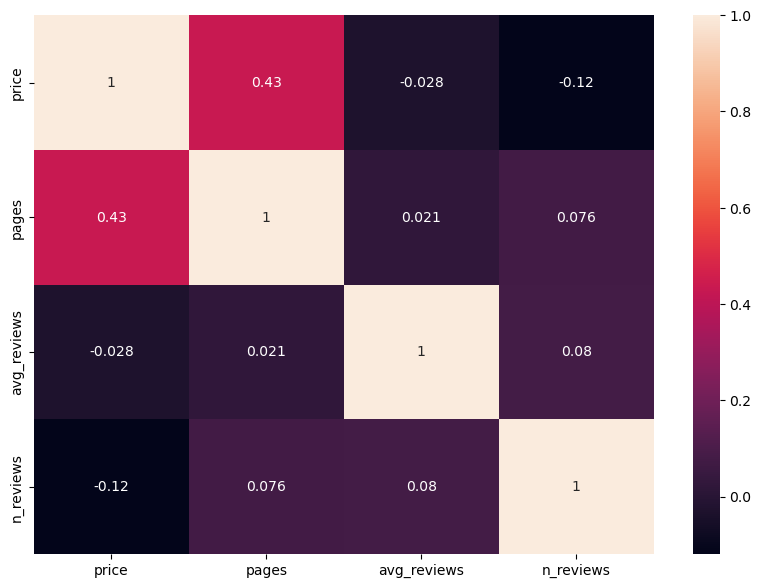

In [265]:
matrice_corr = df.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(matrice_corr, ax=ax, annot=True);

## Price vs. Rating

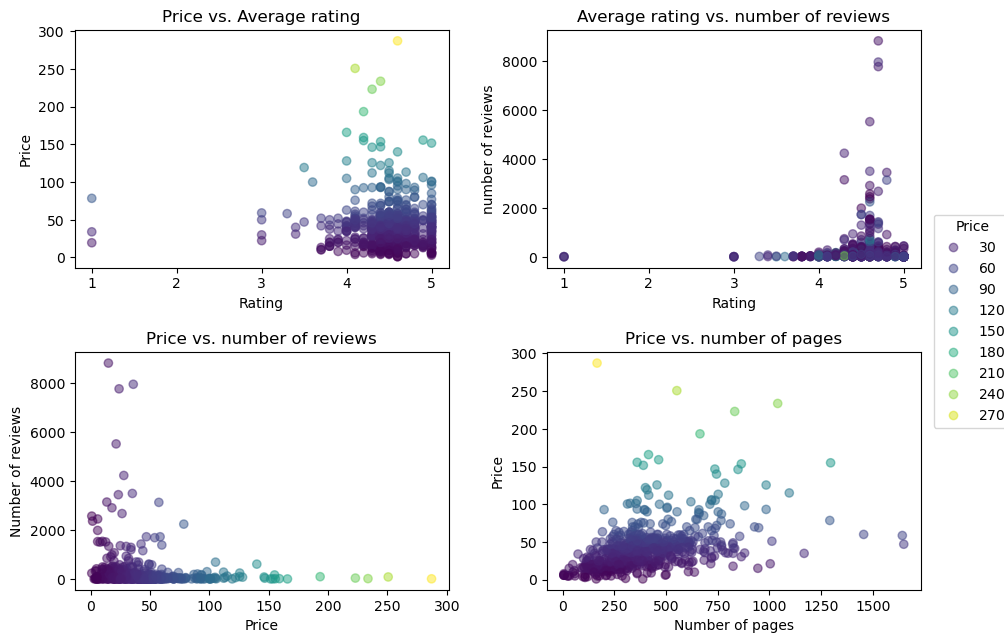

In [271]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 7))
fig.tight_layout(pad=4.0)
scatter1 = ax1.scatter(df.avg_reviews, df.price, c=df.price, alpha=0.5)
ax1.set_title("Price vs. Average rating")
ax1.set_xlabel("Rating")
ax1.set_ylabel("Price")

scatter2 = ax2.scatter(df.avg_reviews, df.n_reviews, c=df.price, alpha=0.5)
ax2.set_title("Average rating vs. number of reviews")
ax2.set_xlabel("Rating")
ax2.set_ylabel("number of reviews")

scatter3 = ax3.scatter(df.price, df.n_reviews, c=df.price, alpha=0.5)
ax3.set_title("Price vs. number of reviews")
ax3.set_xlabel("Price")
ax3.set_ylabel("Number of reviews")

scatter4 = ax4.scatter(df.pages, df.price, c=df.price, alpha=0.5)
ax4.set_title("Price vs. number of pages")
ax4.set_xlabel("Number of pages")
ax4.set_ylabel("Price")

fig.legend(*scatter1.legend_elements(),loc="center right", title="Price", borderaxespad=-0.5)
plt.show();


### Best Python Books

In [290]:
df['title'] = df['title'].apply(str.lower)
df_python_book = df[df['title'].str.contains("python")]
df_python_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 3 to 821
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          248 non-null    object 
 1   author         204 non-null    object 
 2   price          248 non-null    float64
 3   pages          248 non-null    float64
 4   avg_reviews    248 non-null    float64
 5   n_reviews      248 non-null    float64
 6   star5          248 non-null    object 
 7   star4          222 non-null    object 
 8   star3          206 non-null    object 
 9   star2          180 non-null    object 
 10  star1          137 non-null    object 
 11  weight         230 non-null    object 
 12  language       248 non-null    object 
 13  publisher      241 non-null    object 
 14  ISBN_13        232 non-null    object 
 15  link           248 non-null    object 
 16  complete_link  248 non-null    object 
 17  type           248 non-null    object 
dtypes: float64

In [429]:
best_python_book = df_python_book.nlargest(10, ["n_reviews", "avg_reviews"])
best_python_book[["title", "author","price", "avg_reviews", "n_reviews", "type"]]

,title,author,price,avg_reviews,n_reviews,type
633,"python crash course, 2nd edition: a hands-on, ...",[ Eric Matthes],23.99,4.7,7767.0,Paper
394,python: - the bible- 3 manuscripts in 1 book: ...,NaN,27.97,4.3,4228.0,Paper
532,python: for beginners: a crash course guide to...,[ Timothy C. Needham],13.66,4.3,3142.0,Paper
61,"automate the boring stuff with python, 2nd edi...",[ Al Sweigart],26.49,4.7,2672.0,Paper
32,python for everybody: exploring data in python 3,"[ Charles R. Severance, Aimee Andrion, et al.]",0.99,4.6,2568.0,Paper
629,learning python: powerful object-oriented prog...,NaN,46.99,4.5,1724.0,Paper
630,"learning python, 5th edition",NaN,58.55,4.5,1724.0,Paper
3,python for data analysis: data wrangling with ...,[ William McKinney],53.99,4.6,1686.0,Paper
611,coding for kids: python: learn to code with 50...,[ Adrienne Tacke],12.73,4.6,1512.0,Paper
631,python programming language,[ Berajah Jayne],7.95,4.6,1505.0,Paper


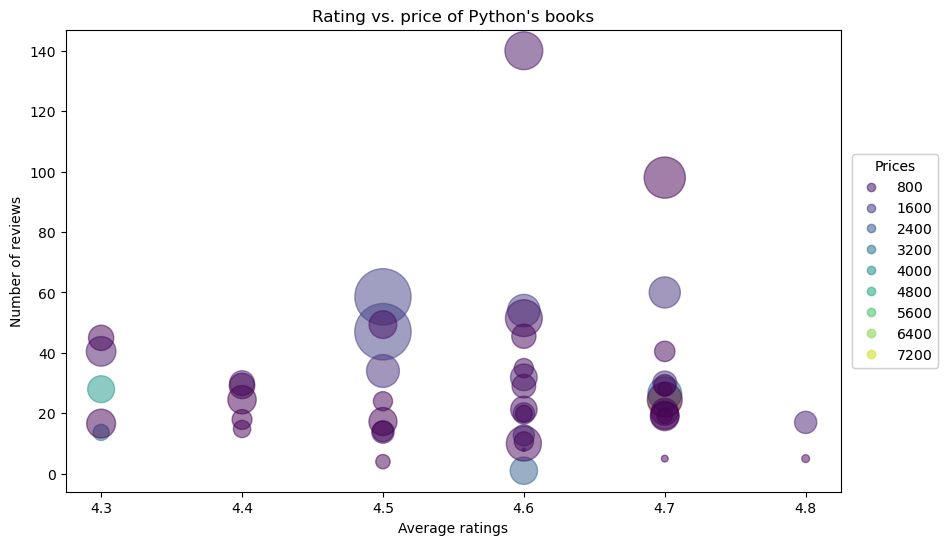

In [408]:
# to remove
prices = best_python_book.price
pages = best_python_book.pages
reviews = best_python_book.n_reviews
ratings = best_python_book.avg_reviews

fig, ax =  plt.subplots(figsize=(10,6))

scatter = ax.scatter(ratings, prices, c=reviews, s=pages, alpha=0.5)
ax.set_title("Rating vs. price of Python's books")
ax.set_xlabel("Average ratings")
ax.set_ylabel("Number of reviews")

legend1 = ax.legend(*scatter.legend_elements(),loc="center right", title="Prices", borderaxespad=-7)
ax.add_artist(legend1)

plt.show();



In [426]:
fig = px.scatter(df_python_book, x="avg_reviews", y="n_reviews", color='price', 
                 size='price', title="Reviews of Python's Books", range_x=[0,5.5], hover_name="title")
fig.show()

### Best Machine Learning Books

In [293]:
df_ML_book = df[df['title'].str.contains("machine learning")]
df_ML_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 19 to 829
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          64 non-null     object 
 1   author         50 non-null     object 
 2   price          64 non-null     float64
 3   pages          64 non-null     float64
 4   avg_reviews    64 non-null     float64
 5   n_reviews      64 non-null     float64
 6   star5          64 non-null     object 
 7   star4          57 non-null     object 
 8   star3          50 non-null     object 
 9   star2          37 non-null     object 
 10  star1          31 non-null     object 
 11  weight         58 non-null     object 
 12  language       64 non-null     object 
 13  publisher      61 non-null     object 
 14  ISBN_13        60 non-null     object 
 15  link           64 non-null     object 
 16  complete_link  64 non-null     object 
 17  type           64 non-null     object 
dtypes: float64

In [399]:
best_ML_book = df_ML_book.nlargest(10, ["n_reviews", "avg_reviews"])
best_ML_book[["title", "author","price", "avg_reviews", "n_reviews", "type"]]

,title,author,price,avg_reviews,n_reviews,type
478,"hands-on machine learning with scikit-learn, k...",[ Aurélien Géron],57.49,4.8,3129.0,Paper
717,the hundred-page machine learning book,[ Andriy Burkov],31.99,4.6,839.0,Paper
720,pattern recognition and machine learning (info...,[ Christopher M. Bishop],105.22,4.6,687.0,Paper
678,mathematics for machine learning,NaN,48.99,4.7,608.0,Paper
591,introduction to machine learning with python: ...,NaN,49.35,4.5,591.0,Paper
241,python: learn coding programs with python prog...,[ TechExp Academy],24.90,4.1,273.0,Paper
726,machine learning design patterns: solutions to...,"[ Valliappa Lakshmanan, Sara Robinson, et al.]",36.99,4.6,263.0,Paper
807,machine learning with r: expert techniques for...,[ Brett Lantz],37.99,4.6,237.0,Paper
498,"becoming a data head: how to think, speak and ...","[ Alex J. Gutman, and , Jordan Goldmeier]",24.49,4.6,209.0,Paper
643,designing machine learning systems: an iterati...,[ Chip Huyen],32.23,4.7,186.0,Paper


In [427]:
fig = px.scatter(df_ML_book, x="avg_reviews", y="n_reviews", color='price', 
                 size='price', title="Reviews of Machine Learning's Books", range_x=[0,5.5], hover_name="title")
fig.show()

### Best Deep learning Books

In [295]:
df_DL_book = df[df['title'].str.contains("deep learning")]
df_DL_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 37 to 827
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          12 non-null     object 
 1   author         10 non-null     object 
 2   price          12 non-null     float64
 3   pages          12 non-null     float64
 4   avg_reviews    12 non-null     float64
 5   n_reviews      12 non-null     float64
 6   star5          12 non-null     object 
 7   star4          10 non-null     object 
 8   star3          9 non-null      object 
 9   star2          6 non-null      object 
 10  star1          5 non-null      object 
 11  weight         11 non-null     object 
 12  language       12 non-null     object 
 13  publisher      11 non-null     object 
 14  ISBN_13        11 non-null     object 
 15  link           12 non-null     object 
 16  complete_link  12 non-null     object 
 17  type           12 non-null     object 
dtypes: float64

In [403]:
best_DL_book = df_DL_book.nlargest(10, ["n_reviews", "avg_reviews"])
best_DL_book[["title", "author","price", "avg_reviews", "n_reviews", "type"]] #.style.set_properties(subset=['title'], **{'width': '300px'}))

,title,author,price,avg_reviews,n_reviews,type
627,"deep learning with python, second edition",[ Francois Chollet],39.49,4.7,197.0,Paper
493,machine learning with python cookbook: practic...,NaN,49.18,4.5,178.0,Paper
821,machine learning with pytorch and scikit-learn...,"[ Sebastian Raschka, Yuxi (Hayden) Liu, et al.]",39.02,4.6,164.0,Paper
463,deep learning from scratch: building with pyth...,[ Seth Weidman],38.99,4.3,84.0,Paper
825,deep learning: engage the world change the world,"[ Michael Fullan, Joanne Quinn, et al.]",5.33,4.5,74.0,Paper
465,modern computer vision with pytorch: explore d...,"[ V Kishore Ayyadevara, and , Yeshwanth Reddy]",48.84,4.6,56.0,Paper
37,practical deep learning: a python-based introd...,[ Ronald T. Kneusel],36.99,4.7,38.0,Paper
205,deep learning: a comprehensive guide to python...,NaN,4.97,4.7,22.0,Paper
570,deep learning with pytorch lightning: swiftly ...,[ Kunal Sawarkar],46.99,4.3,15.0,Paper
827,practical deep learning at scale with mlflow: ...,"[ Yong Liu, and , Dr. Matei Zaharia]",44.99,4.8,8.0,Paper


In [428]:
fig = px.scatter(df_DL_book, x="avg_reviews", y="n_reviews", color='price', 
                 size='price', title="Reviews of Deep Learning's Books", range_x=[0,5.5], hover_name="title")
fig.show()

In [67]:
df_auth = df.groupby("author")['title'].count().sort_values(ascending = False)
df_auth[df_auth > 1].reset_index()

,author,title
0,[ Al Sweigart],8
1,[ Chad Knowles],3
2,[ Eric Matthes],3
3,[ Inc. BarCharts],3
4,[ Yves Hilpisch],3
5,[ Jim Frost],3
6,[ Paul A. Zandbergen],3
7,[ Leonard J. Ledger],3
8,[ Alan Agresti],3
9,[ Greg Deckler],2


In [ ]:
df_dvd = df[df['title'].str.endswith("[DVD]")]

print(f"Numbers of DVD : {len(df_dvd)}")
df_dvd.head().style.set_properties(subset=['title'], **{'width': '300px'})

In [ ]:
df_bluray = df[df['title'].str.endswith("[Blu-ray]")]

print(f"Numbers of Blu-Ray : {len(df_bluray)}")
df_bluray.head().style.set_properties(subset=['title'], **{'width': '300px'})

> Then articles which ones include DVD or Blu-Ray in their title name.

In reviewing the list from the ISBN code, we can see that we 4 types of category of products:
- 

Only very few articles in the dataset are other than books. 

As a consequence, to take into consideration our discoveries, we will re-arrange the dataset as following:
* Keep only books (removing articles flagged as DVD and Blu-ray)
* Keep only Data-science related articles
* Keep only enlish-written books (removing spanish books)
* Keeping books without NaN
* Clean language field (replace all by "English")


* B. 

In [ ]:
df[(df["language"] == "standard library") | 
   (df["language"] == "Scroll to the top of the page and click the ") | 
   (df["language"] == "you will discover all you need ")]


In [ ]:
#df["language"] = df["language"].astype(str)

In [ ]:
rst = df.language.map(lambda w: len(w))
print(rst)

In [ ]:
df.sort_values(by=['language'], ascending=False)

In [ ]:
rst.sort_value(by=['min', 'max'], ascending=False)

In [ ]:
df.language.dtypes